In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [3]:


fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



4423680/4422102 [==============================] - 0s 0us/step


In [4]:


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



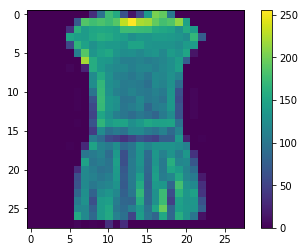

In [8]:


plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()



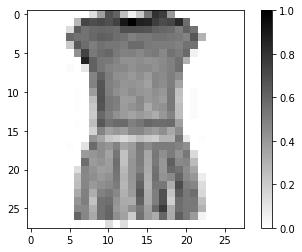

In [23]:
# Hmm so this `cmap=plt.cm.binary` kwarg displays grayscale instead of that strange purple to yellow scale.
plt.figure()
plt.imshow(train_images[3]/255.0, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


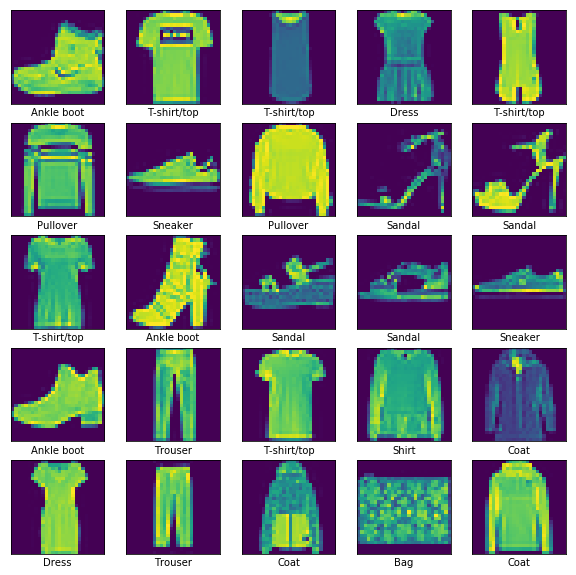

In [25]:
# This is almost like the output of a TSA luggage xray scanner 

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]) # , cmap=plt.cm.binary
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [26]:

train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0


In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


Instructions for updating:
Colocations handled automatically by placer.


In [28]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [29]:
# Looking at the use of the non-scaled data first.
# Wow that looks like terrible accuracy.
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 4s 70us/sample - loss: 14.5146 - acc: 0.0995
Epoch 2/5
60000/60000 [==============================] - 4s 66us/sample - loss: 13.7328 - acc: 0.1479
Epoch 3/5
60000/60000 [==============================] - 4s 66us/sample - loss: 13.0450 - acc: 0.1906
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 13.0474 - acc: 0.1905
Epoch 5/5
60000/60000 [==============================] - 4s 68us/sample - loss: 12.9979 - acc: 0.1936


In [30]:
# Yea if that is out of 1.0 then this 0.1917 is pretty low
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 26us/sample - loss: 13.0283 - acc: 0.1917
Test accuracy: 0.1917


In [32]:
# Try on that scaled data now ..
# Okay this looks better. more like the result in the tutorial.
model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.5902 - acc: 0.8182
Epoch 2/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3900 - acc: 0.8622
Epoch 3/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3526 - acc: 0.8739
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3319 - acc: 0.8788
Epoch 5/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3141 - acc: 0.8858


In [34]:
model.input_shape, model.output_shape

((None, 28, 28), (None, 10))

In [35]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 128) dtype=float32>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'dense_1/kernel:0' shape=(128, 10) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32>]

In [37]:
test_loss, test_acc = model.evaluate(test_images_scaled, test_labels)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 0s 34us/sample - loss: 0.3489 - acc: 0.8740
Test accuracy: 0.874


In [38]:
predictions = model.predict(test_images_scaled)

In [39]:
predictions[0], test_labels[0]

(array([1.3787793e-05, 5.9650089e-09, 1.9482790e-07, 1.8630770e-09,
        3.6141572e-07, 3.6579393e-02, 1.0138750e-05, 1.5758899e-01,
        1.9775856e-04, 8.0560941e-01], dtype=float32), 9)

In [40]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


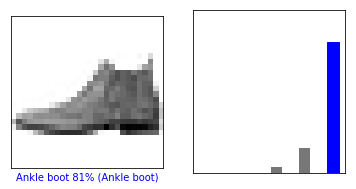

In [41]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


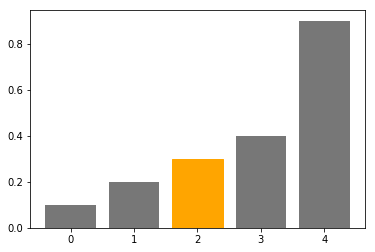

In [44]:
thisplot = plt.bar(range(5), [.1, .2, .3, .4, .9], color="#777777")
thisplot[2].set_color('orange')

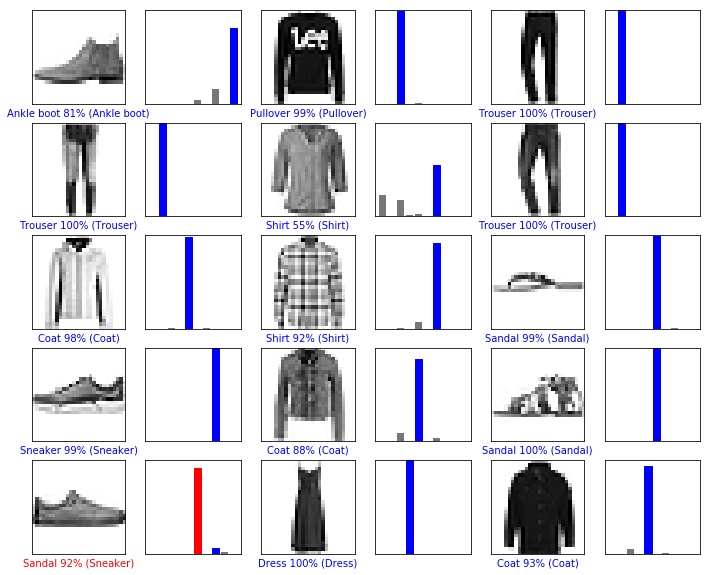

In [45]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()


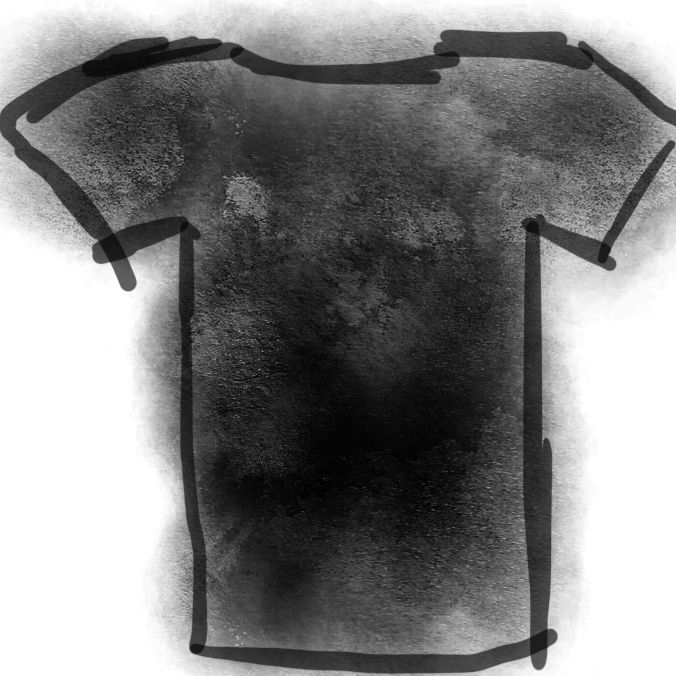

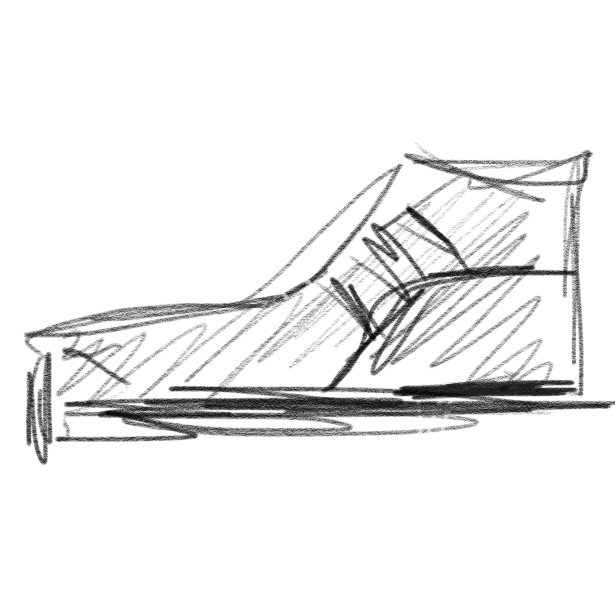

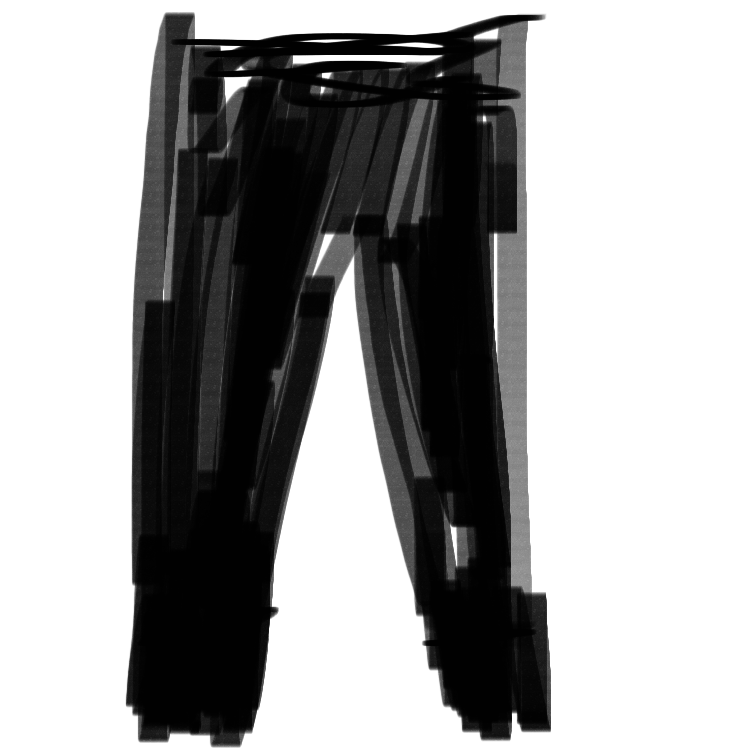

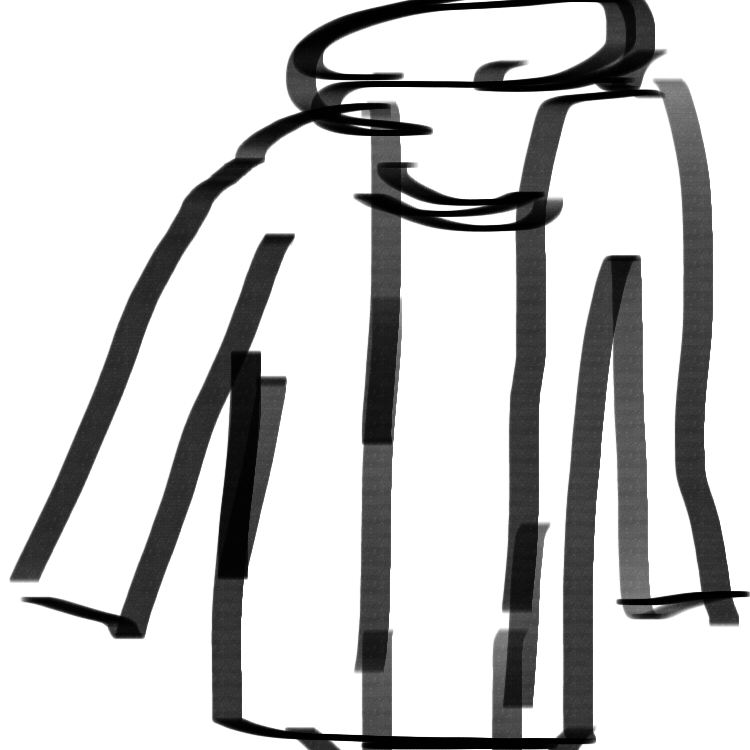

[None, None, None, None]

In [56]:
# For fun, I want to try and run the model on my own hand drawn images.
# Raw im
import IPython.display as ipd # import Image

# These four pngs were created w/ Adobe sketchbook
# Then I manually cropped them with macOS Preview to make sure they are squares.
rawnames = ['2019-05-13 14.29.04.png',
                 '2019-05-13 14.30.20.png',
                 '2019-05-13 14.31.18.png',
                 '2019-05-13 14.32.27.png']
filenames = [
        'keras-fashion-helloworld/myimages-originals/' + x
        for x in rawnames
    ]

[ipd.display(ipd.Image(filename=fn))
    for fn in filenames]
# ipd.Image(filename='keras-fashion-helloworld/myimages-originals/2019-05-13 14.29.04--8.png')





In [49]:
# with the help of PIL, obtained with `pip install Pillow`
from PIL import Image

def extract_vec(img):
    # re-scale to 28x28 in place
    img.thumbnail((28, 28), Image.ANTIALIAS)
    
    values = list(img.getdata())
    
    pixels = np.array([x[0] for x in values])
    
    return np.resize(pixels, (28, 28))
    
    
    

In [54]:
# quick example of first image, 
print(extract_vec(Image.open(filenames[0])))

[[254 250 240 238 242 255 255 252 247 232 226 226 228 229 228 229 228 234
  244 246 245 247 248 255 255 254 255 255]
 [244 223 195 187 170 143 137 141 139 155 172 171 185 194 190 186 183 189
  121 101 110 113 104 147 205 242 249 255]
 [226 195 148  86  26  13  29  52  65  78  71  89 103 114 115 104  92  74
   61  99 103  99  82  58  67 148 224 248]
 [202 117  52  47  53  61  86  88  91  96  91  84  79  79  75  74  78  71
  111 120 122 129 115  99  94  79 109 218]
 [104  59  84  97  67  56  54  50  65  68  72  82  89  94  93  97 115 109
  125 115  92  94  82  69  70  89  89 112]
 [ 89 139 127  79  58  53  61  48  55  63  52  51  59  63  64  69  79  86
  110 119  91  75  79  71  69  72 110 138]
 [159  77 115 106  76  68  74  57  53  55  40  41  52  58  57  60  65  68
   88 101  97 100  92  84  94  98 107 117]
 [213 149  62 100  97  76  70  58  61  84  80  43  56  67  62  53  60  55
   57  70  94 108 107 112 107 119  90 148]
 [216 198 126  43 102 100  62  69  84  88 102  59  57  68  58  5

In [58]:
filenames[0]

'keras-fashion-helloworld/myimages-originals/2019-05-13 14.29.04.png'

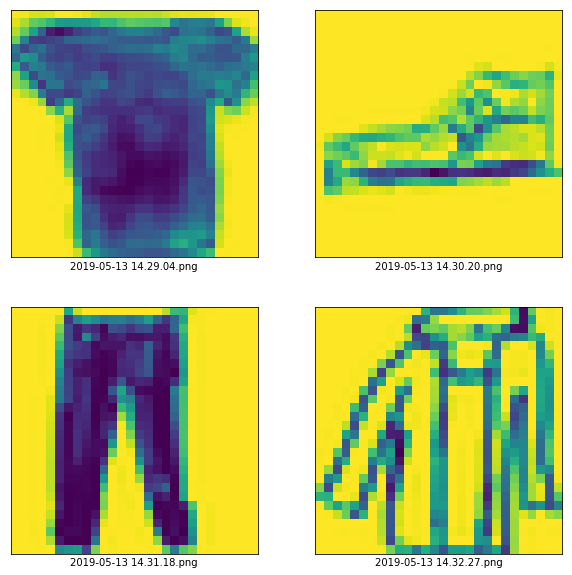

In [78]:
# 
my_clothing_vecs = np.array([extract_vec(Image.open(fn)) for fn in filenames])

# and so lets try and display them with matplot lib again like the provided images...
plt.figure(figsize=(10,10))
for i in range(len(my_clothing_vecs)):
    plt.subplot(2, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(my_clothing_vecs[i]) # , cmap=plt.cm.binary
    plt.xlabel(rawnames[i])
plt.show()

In [79]:
my_clothing_vecs.shape

(4, 28, 28)

In [82]:
# Ah crap, this looks inverted compared to what I see in the tutorial. 
# Going to attempt to invert that real quick...

invert255 = lambda x: abs(255 - x) 

def invert_many(img_vec):
    input_shape = img_vec.shape
    length = input_shape[0] * input_shape[1]
    
    invert_pxl = lambda x: abs(255 - x) 
    
    return np.resize(
        [invert_pxl(x)
         for x in np.resize(img_vec, (1, length))],
        
                     input_shape)
    

In [83]:
# invert them all
clothing_vecs_inverted = np.vectorize(invert255)(my_clothing_vecs)

In [85]:
my_clothing_vecs.shape, clothing_vecs_inverted.shape

((4, 28, 28), (4, 28, 28))

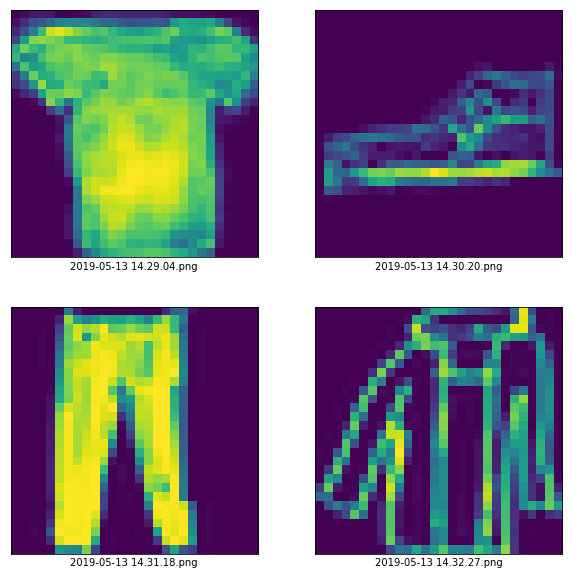

In [86]:
# Okay cool... now this looks like the other earlier data.

plt.figure(figsize=(10,10))
for i in range(len(clothing_vecs_inverted)):
    plt.subplot(2, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(clothing_vecs_inverted[i]) # , cmap=plt.cm.binary
    plt.xlabel(rawnames[i])
plt.show()

In [87]:
# Now lets see what the predictions say

# First the scaling...
my_scaled_and_inverted = clothing_vecs_inverted/255.0

newpredictions = model.predict(my_scaled_and_inverted)

In [92]:
print(list(enumerate(class_names)))

[(0, 'T-shirt/top'), (1, 'Trouser'), (2, 'Pullover'), (3, 'Dress'), (4, 'Coat'), (5, 'Sandal'), (6, 'Shirt'), (7, 'Sneaker'), (8, 'Bag'), (9, 'Ankle boot')]


In [93]:
my_test_labels = np.array([0, 7, 1, 4])

In [88]:
newpredictions

array([[4.26309437e-01, 2.92650770e-06, 1.60550058e-04, 9.47394001e-04,
        1.30431754e-05, 1.05808425e-07, 5.70735812e-01, 5.16380161e-10,
        1.83065375e-03, 7.26391747e-09],
       [2.88550858e-03, 3.26211921e-05, 8.07017728e-04, 7.98632973e-05,
        3.09603085e-04, 7.77611732e-01, 1.04915572e-03, 1.50996149e-01,
        6.37709629e-03, 5.98511957e-02],
       [1.78965013e-02, 8.74079406e-01, 4.85132486e-02, 3.52283381e-03,
        3.91321108e-02, 1.26371131e-04, 1.65334735e-02, 1.32581690e-07,
        1.95919056e-04, 2.40851268e-08],
       [6.74940348e-02, 6.74244831e-04, 7.51323474e-04, 2.22629853e-04,
        3.27958390e-02, 3.78045649e-03, 6.39505684e-01, 7.55926128e-04,
        1.57964438e-01, 9.60554630e-02]], dtype=float32)

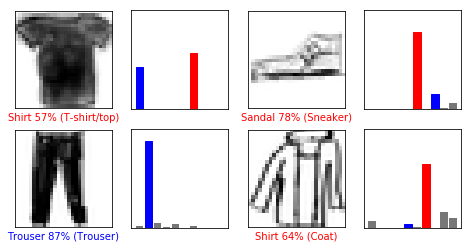

In [94]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 2
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, newpredictions, my_test_labels, my_scaled_and_inverted)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, newpredictions, my_test_labels)
plt.show()


In [95]:
# Wow, that looks pretty good. 
# - Haha apparently the Tshirt I drew looks a bit more like a "Shirt"
# - And my coat looks like a "Shirt" . Of course that was expected. I have no idea how that distinction 
#     is captured by the model
# - And yea, my sneaker looks kind of like a sandal? Okay makes sense. 